# BÀI TẬP: DỰ ĐOÁN ĐIỂM CUỐI KÌ CỦA SINH VIÊN

* **Thành viên:**

 * Nguyễn Văn Kiệt - 15520401
 * Lê Xuân Trường - 19522444
 * Lê Duy Hoàng - 19521533

In [159]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# *Đọc dữ liệu:*

In [2]:
wecode = pd.read_csv(r'C:\Users\ADMIN\Documents\code\CS114.L21\Predict_score\Data\wecode.csv')
score_training = pd.read_csv(r'C:\Users\ADMIN\Documents\code\CS114.L21\Predict_score\Data\score_training.csv')

In [5]:
print("WECODE DATA INFO:")
wecode.info()
print("SCORE_TRAINING INFO:")
score_training.info()

WECODE DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB
SCORE_TRAINING INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id

In [3]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,30/10/2020 10:58,30/10/2020 10:58
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,30/10/2020 11:07,30/10/2020 11:07
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,30/10/2020 11:08,30/10/2020 11:23
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,30/10/2020 11:11,30/10/2020 11:11
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,30/10/2020 11:15,30/10/2020 11:15
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,28/04/2021 09:34,28/04/2021 09:34
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,28/04/2021 09:35,28/04/2021 09:35
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,28/04/2021 09:35,28/04/2021 09:35
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,11/05/2021 01:34,11/05/2021 01:35


In [4]:
score_training

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


In [7]:
# Đổi tên cột dữ liệu id thuộc file score_training:
score_training.rename(columns={'id':'user_id'}, inplace=True)
score_training

,user_id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


In [110]:
User_solved = wecode[wecode["pre_score"]==10000].groupby("user_id")["problem_id"].agg(solved = "nunique")

User_solved['submitted'] = wecode.groupby("user_id")["id"].agg(count = "nunique")
User_solved['tried_per_problem'] = round((solved_per_user['submitted']  / solved_per_user['solved']), 2)
User_solved


,solved,submitted,tried_per_problem
user_id,,,
1,1,2,2.00
4,40,54,1.35
5,3,6,2.00
6,85,130,1.53
11,12,50,4.17
...,...,...,...
1860,26,76,2.92
1862,4,12,3.00
1864,28,187,6.68


# *Phân tích dữ liệu - Lọc những cột cần thiết*

In [8]:
# Lọc lấy điểm thi cuối kì của sinh viên:
score_training = score_training[['user_id','CK']]
score_training

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


## * Dự đoán điểm cuối kì dựa trên mức độ chăm chỉ của sinh viên qua quá trình làm bài tập wecode. *

In [14]:
#Hàm đếm số problems:  
def Problems_Solved_Amount(data):
  if data['is_final'] == 1:
    return 1
  return 0

In [15]:
wecode['solved_problem'] = wecode.apply(Problems_Solved_Amount,axis=1)

In [16]:
groupByUserId = wecode.groupby(by='user_id', sort= True)

In [111]:
TestingData = pd.DataFrame({
    # Assignment tried:
    'assignment_tried': groupByUserId['assignment_id'].nunique(),  
    # Problems tried:
    'problem_tried': groupByUserId['problem_id'].nunique(),
    # Problems is completed:
    'completed_problem': groupByUserId['solved_problem'].apply(lambda x: (x==1).sum()),
    # total pre score = 10000:
    'total_pre_score': groupByUserId['pre_score'].apply(lambda x: (x==10000).sum()),
    # total score:
    'total_score': groupByUserId.apply(lambda x: x[x['is_final'] == 1]['pre_score'].sum())
})
TestingData

,assignment_tried,problem_tried,completed_problem,total_pre_score,total_score
user_id,,,,,
1,1,2,2,1,10000
4,1,41,38,44,370000
5,4,5,5,3,30000
6,4,88,88,89,850000
7,1,2,2,0,9209
...,...,...,...,...,...
1860,10,43,48,29,329665
1862,2,6,6,4,40000
1864,5,63,63,30,439741


In [53]:
Total_score = wecode[wecode['is_final'] == 1]
Total_score = Total_score[['user_id', 'pre_score', 'coefficient']] 
Total_score = Total_score[Total_score['coefficient'] != 'error']
Total_score['score'] = (Total_score['pre_score']*pd.to_numeric(Total_score['coefficient']))/100

Total_score = Total_score.groupby("user_id")["score"].agg(total_score = "sum")
Total_score

,total_score
user_id,
1,10000.0
4,370000.0
5,30000.0
6,850000.0
7,9209.0
...,...
1860,329665.0
1862,40000.0
1864,439741.0


In [127]:
res = pd.merge(TestingData, score_training, how='inner', on=['user_id'])
res['CK'] = pd.to_numeric(res['CK'], errors='coerce')
res = pd.merge(res,Total_score, how='inner', on=['user_id','total_score'])
res = pd.merge(res, User_solved, how='inner', on=['user_id'])
columns_titles = ["user_id", "assignment_tried", "problem_tried", "completed_problem", 'total_pre_score', "total_score", "solved","submitted","tried_per_problem","CK"]
res = res.reindex(columns=columns_titles)
res

C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\reshape\merge.py:1151: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,user_id,assignment_tried,problem_tried,completed_problem,total_pre_score,total_score,solved,submitted,tried_per_problem,CK
0,24,15,78,77,80,750299,73,164,2.25,9.5
1,27,2,5,5,4,39000,3,13,4.33,10.0
2,29,13,80,80,75,762760,72,199,2.76,8.5
3,34,11,84,84,81,822888,81,218,2.69,6.5
4,35,25,147,151,152,1477000,141,297,2.11,4.5
...,...,...,...,...,...,...,...,...,...,...
699,1856,5,31,31,23,270790,23,64,2.78,7.5
700,1857,6,34,40,37,386000,33,55,1.67,4.0
701,1859,7,27,30,3,39000,3,31,10.33,1.5
702,1862,2,6,6,4,40000,4,12,3.00,7.5


<AxesSubplot:xlabel='tried_per_problem'>

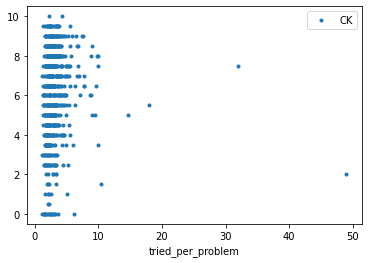

In [113]:
res.plot(x='tried_per_problem', y='CK', style='.',)

<AxesSubplot:xlabel='completed_problem'>

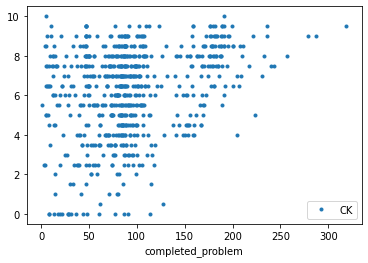

In [114]:
res.plot(x='completed_problem', y='CK', style='.',)

<AxesSubplot:xlabel='total_score'>

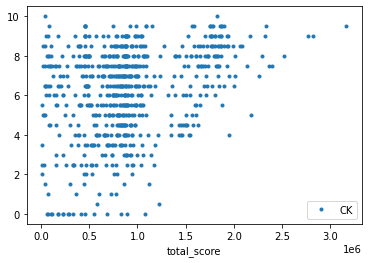

In [115]:
res.plot(x='total_score', y='CK', style='.',)

<AxesSubplot:xlabel='submitted'>

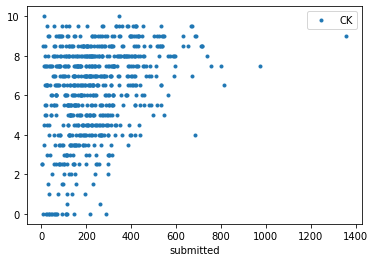

In [116]:
res.plot(x='submitted', y='CK', style='.',)

# *SỬ DỤNG LINEAR REGRESSION ĐỂ DỰ ĐOÁN ĐIỂM*

In [152]:
res = res.dropna()
res

,user_id,assignment_tried,problem_tried,completed_problem,total_pre_score,total_score,solved,submitted,tried_per_problem,CK
0,24,15,78,77,80,750299,73,164,2.25,9.5
1,27,2,5,5,4,39000,3,13,4.33,10.0
2,29,13,80,80,75,762760,72,199,2.76,8.5
3,34,11,84,84,81,822888,81,218,2.69,6.5
4,35,25,147,151,152,1477000,141,297,2.11,4.5
...,...,...,...,...,...,...,...,...,...,...
699,1856,5,31,31,23,270790,23,64,2.78,7.5
700,1857,6,34,40,37,386000,33,55,1.67,4.0
701,1859,7,27,30,3,39000,3,31,10.33,1.5
702,1862,2,6,6,4,40000,4,12,3.00,7.5


In [153]:
X = res[['assignment_tried','problem_tried','completed_problem','total_pre_score','total_score','solved','submitted','tried_per_problem']]
Y = res['CK']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [156]:
CK_linear = LinearRegression().fit(X_train,y_train)



In [157]:
CK_linear.intercept_ , CK_linear.coef_

(5.616725995185888,
 array([-8.42727662e-02,  1.59550403e-01, -3.27141000e-01, -1.85034946e-02,
         3.71453657e-05, -1.74784241e-01,  2.94157482e-03,  4.24433530e-02]))

In [160]:
y_pred = CK_linear.predict(X_train)
MSError = sklearn.metrics.mean_squared_error(y_train, y_pred)
print("Mean squared error:", MSError)

Mean squared error: 3.6792424027623643


In [164]:

pre1 = CK_linear.predict(X_train)
pre2 = CK_linear.predict(X_test)

CK_pre = np.append(pre1, pre2)
data_full = res[res["CK"]>=0]
CK_data = [data_full["user_id"], data_full["CK"]]
headers = ["user_id", "CK"]
CK = pd.concat(CK_data, axis=1, keys=headers)

CK['TBM_pre'] = pd.Series(CK_pre, index=CK.index)
CK.head(20)

,user_id,CK,TBM_pre
0,24,9.5,6.373125
1,27,10.0,5.531162
2,29,8.5,6.657535
3,34,6.5,8.426554
4,35,4.5,7.011970
5,37,7.5,6.131575
6,41,8.0,6.172797
7,42,7.5,5.424615
8,43,6.0,6.602529
9,45,7.5,5.241539


# *NHẬN XÉT*

### * Với một bài toán dự đoán điểm cuối kì (hay điểm trung bình) luôn là một bài toán với độ chính xác không cao. Bởi vì đối tượng là sinh viên, với cách tính toán điểm bằng quá trình nộp bài hoặc là sự chuyên cần của sinh viên, chỉ mang lại kết quả khách quan, bởi vì sẽ còn rất nhiều vất đề ảnh hưởng đến điểm thi cuối kì như sức khỏe, độ khó đề bài, độ khó của giảng viên chấm thi, hoặc là tình hình tâm lý của sinh viên. *

### * Vậy nên, chúng em đã cố gắng hết sức để tìm ra được một cách giải mà tụi em nghĩ là hợp lý trong một số trường hợp. Cảm ơn thầy đã xem. *